In [2]:
pip install pandas seaborn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Read data from the csv file (D3_Paper and online short term visa applications received by year and nationality.csv)
csv_data = pd.read_csv('D3.csv')

# Transform the data to a pandas dataframe
df = pd.DataFrame(csv_data)

In [4]:
#Q.1 Data Statistics and characteristics
# Data Statistics
print('Data Statistics')
print(df.describe())

#Data characteristics

# Data population
print('Data population')
print(df.shape)

#Data attributes
print('Attributes details')
print(df.columns.to_list())

#Types of attributes
print('Types of  attributes')
print(df.dtypes)

Data Statistics
        Nationality 2017 2018 2019 2020 2021 2022 2023
count           112  112  112  112  112  112  112  112
unique          112   97   94   94   70   66   90   91
top     Afghanistan    *    6    *    *    *    *    *
freq              1    6    4    4   11   16   10    8
Data population
(112, 8)
Attributes details
['Nationality', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Types of  attributes
Nationality    object
2017           object
2018           object
2019           object
2020           object
2021           object
2022           object
2023           object
dtype: object


In [5]:
# Q.2 Data Manipulation
import numpy as np
# dealing with Missing Values

# As there are no missing value's, "*" is considered missing value
# replace the "*" wth np.NaN
df.replace('*', np.NaN, inplace=True)
# Check for missing values 

print('Missing values')
print(df.isnull().sum()) 

Missing values
Nationality     0
2017            6
2018            2
2019            4
2020           11
2021           16
2022           10
2023            8
dtype: int64


In [6]:
# Drop the rows with missing values
df.dropna(inplace=True)

print('Missing values after dropping')
print(df.isnull().sum())

# Data population after dropping missing values
print(df.shape)

Missing values after dropping
Nationality    0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           0
dtype: int64
(82, 8)


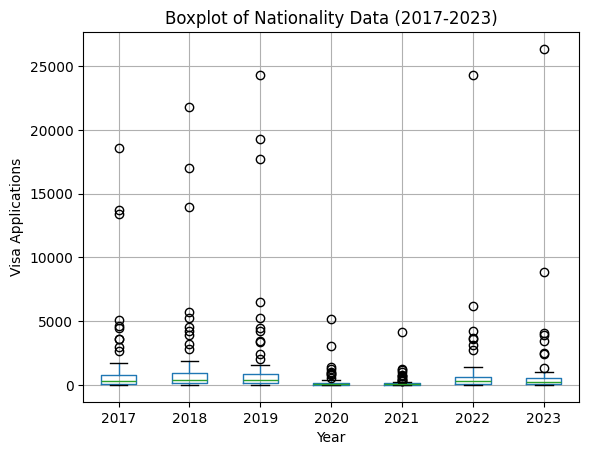

In [7]:
# Dealing with outliers

# Check for outliers
import matplotlib.pyplot as plt

# Ensure the columns are numerical
columns_to_check = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Use boxplot to show outliers for each year from 2017 to 2023
df.boxplot(column=columns_to_check)

plt.title('Boxplot of Nationality Data (2017-2023)')
plt.ylabel('Visa Applications')
plt.xlabel('Year')
plt.show()

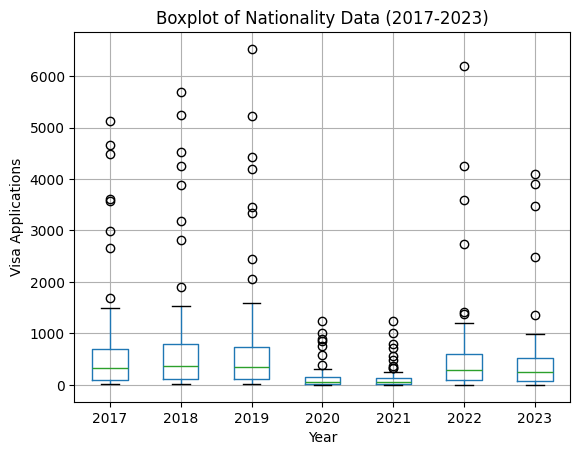

In [8]:
# remove outliers
from scipy import stats
# Z-score method
z_scores = stats.zscore(df[columns_to_check])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Check for outliers after removing

df.boxplot(column=columns_to_check)

plt.title('Boxplot of Nationality Data (2017-2023)')
plt.ylabel('Visa Applications')
plt.xlabel('Year')
plt.show()

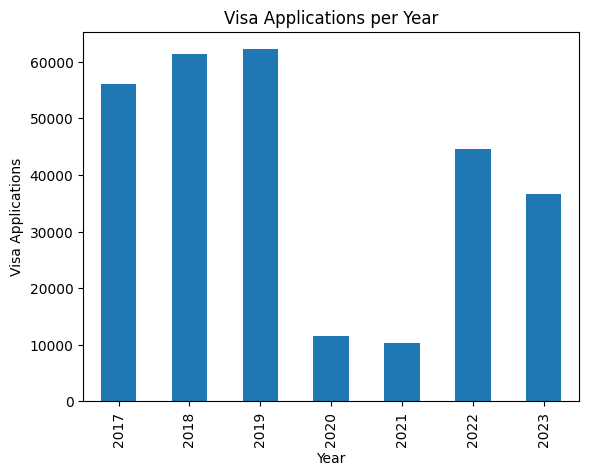

In [9]:
#Data Visualisation
# 1 graph from the top group: histogram

# Sum the visa applications for each year from 2017 to 2023
yearly_sum = df[columns_to_check].sum()

# Plot the histogram
yearly_sum.plot(kind='bar', title='Visa Applications per Year', ylabel='Visa Applications', xlabel='Year')
plt.show()

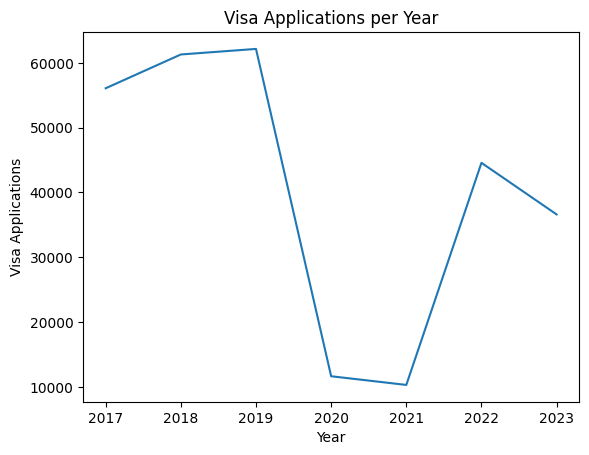

In [18]:
# 2. 1 graph from the middle group: line chart

# Plot the line chart
yearly_sum.plot(kind='line', title='Visa Applications per Year', ylabel='Visa Applications', xlabel='Year')
plt.show()

In [20]:
# 3. 1 graph from the bottom group: bubble chart

# Group the data by year (assuming 'Year' is the index)
yearly_data = df[columns_to_check].sum()

# Create a bubble chart
plt.scatter(yearly_data.index, yearly_data, s=yearly_data, alpha=0.5)

In [ ]:
# Machine Learning Use Cases

# ML algorithm
#Proposed use case: Predict the number of visa applications for the next year

#ML algorithm implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = yearly_data.index.values.reshape(-1, 1)
y = yearly_data.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the number of visa applications for the next year (2024)
next_year = model.predict([[2024]])

print('Predicted number of visa applications for 2024:', int(next_year[0]))


Predicted number of visa applications for 2024: 6644
Accuracy: -2.03
